# Scraping insight AI fellows data

In this notebook, I'll extract data about insight fellows in order to learn more about past programs fellows and the kind of jobs they obtain after completing the program. I'll use `requests` for obtaining webpages, `Beautiful Soup` for parsing webpages and extracting data and `pandas` for analyzing the data.

### import libraries:

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

### Get web page:

In [2]:
url = 'https://www.insightdata.ai/fellows'
response = requests.get(url)

### Extract content:

First, let's look at the entire html structure to understand how it is built and what would we want to extract

In [3]:
content = BeautifulSoup(response.content, 'html.parser')
# print(content.prettify())

All the information about each fellow is placed under a `<div>` section of class `fellows_tooltip`. let's see, for example, how this section looks like for the first fellow: 

In [4]:
c = content.find('div', {'class':'fellows_tooltip'})
print(c.prettify())

<div class="fellows_tooltip">
 <div class="arrow_down">
 </div>
 <div class="tooltip_header orange_header">
  <div class="tooltip_header_container">
   <div class="tooltip_name">
    Anitha Priya Krishnan
   </div>
   <div class="toottip_title">
    Bioinformatics scientist
   </div>
   <div class="comma">
    ,
   </div>
   <div class="tooltip_company">
    Chan Zuckerberg Biohub
   </div>
  </div>
 </div>
 <div class="tooltip_content">
  <div class="tooltip_title">
   Insight Project
  </div>
  <div class="tooltip_project">
   Reducing the memory requirements of trained neural networks using weight pruning
  </div>
  <div class="tooltip_title">
   background
  </div>
  <div class="tooltip_background">
   Biomedical Engineering, Rochester University, PhD
  </div>
 </div>
</div>



So all we have to do is to find all the `<div class="fellows_tooltip">` sections in the html and then for each instance append the name, title, company, project, and background of each fellow in to the corresponding list:

In [5]:
# create lists for every data element
fellow_name = []
fellow_title = []
fellow_company = []
fellow_project = []
fellow_background = []

# find all the fellow tool tips and append each data element to the corresponding list
for tooltip in content.find_all('div', {'class':'fellows_tooltip'}):
    fellow_name.append(tooltip.find('div', {'class':'tooltip_name'}).text)
    fellow_title.append(tooltip.find('div', {'class':'toottip_title'}).text)
    fellow_company.append(tooltip.find('div', {'class':'tooltip_company'}).text)
    fellow_project.append(tooltip.find('div', {'class':'tooltip_project'}).text)
    fellow_background.append(tooltip.find('div', {'class':'tooltip_background'}).text)

# create a dictionary to hold all the data
data = {'name':fellow_name, 'title':fellow_title, 'company':fellow_company,\
        'project':fellow_project, 'background':fellow_background}

In [6]:
fellow_data = pd.DataFrame(data) # data frame of fellows data
num_fellows = len(fellow_data.index) # total number of fellows 
fellow_data

,name,title,company,project,background
0,Anitha Priya Krishnan,Bioinformatics scientist,Chan Zuckerberg Biohub,Reducing the memory requirements of trained ne...,"Biomedical Engineering, Rochester University, PhD"
1,Bob Guo,Senior ML Scientist,Amazon Alexa,Colorizing gray images using HyperColumns and ...,"Electrical Engineering, Peking University, PhD"
2,David Gainer,Software Engineer,Google,Bringing Synthetic Faces to Life using deep le...,"Computer Science, Columbia University, MS"
3,Drumil Deshpande,Software Engineer - ML,Applicantz,An end to end system to generate tags and capt...,"Computer Science, University of Florida, MS"
4,Emmanuel Ameisen,AI Lead,Insight,Applying Neural Style Transfer to Speech,"Data Scientist, Zipcar"
5,Edward Kim,ML Engineer,Agero,Real-time video super-resolution,"Astronomy, University of Illinois Urbana-Champ..."
6,Jeffrey Hetherly,Deep Learning Software Engineer,NVIDIA,Audio upsampling using deep learning,"Physics, Southern Methodist University, PhD"
7,Lily Hu,Research Scientist,Salesforce Research,CNNs for image segmentation to separate overla...,"Mechanical Engineering, UC Berkeley, PhD"
8,Markus Huber,Senior Data Scientist,Climate Corporation,Generation of artificial images of face aging ...,"Astrophysics, Ludwig-Maximillians University, PhD"
9,Natalie Serrino,Founding Engineer,Stealth Startup,Generating complementary harmonies for melody ...,"Senior Software Engineer, Trifacta"


### Analyze data

Let's explore the background education of the fellows

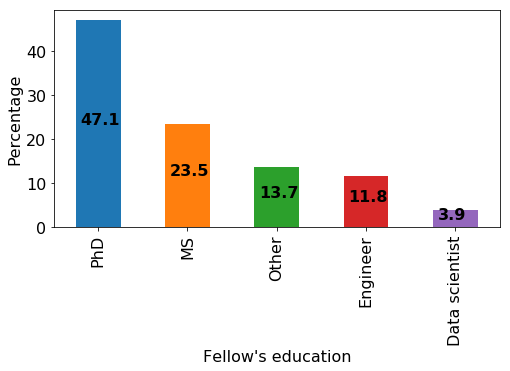

In [7]:
PhD = fellow_data.background.str.contains('PhD|Ph.D|DPh')
PhD_per = 100 * PhD.sum()/num_fellows

MS = fellow_data.background.str.contains('MS')
MS_per = 100 * MS.sum()/num_fellows

DS = fellow_data.background.str.contains('Data Scientist')
DS_per = 100 * DS.sum()/num_fellows

Engineer = fellow_data.background.str.contains('Engineer') & ~(PhD | MS | DS)
Engineer_per = 100 * Engineer.sum()/num_fellows

other = ~(PhD | MS | Engineer | DS)
other_per = 100 * other.sum()/num_fellows

education = ['PhD', 'MS', 'Engineer', 'Data scientist', 'Other']
ed_percentage = [PhD_per, MS_per, Engineer_per, DS_per, other_per]
fellows_education = pd.Series(data= ed_percentage, index= education).sort_values(ascending = False)


plt.figure(figsize = (8,4))
plt.rcParams.update({'font.size': 16})
fellows_education.plot('bar')
plt.xlabel('Fellow\'s education')
plt.ylabel('Percentage')
for i,v in enumerate(fellows_education):
    plt.text(i -.2, v/2, str(round(v,1)), fontweight = 'bold')

What does "other" contain?

In [8]:
fellow_data[other]

,name,title,company,project,background
16,Bruno Guisard,Machine Learning Engineer,"Liftoff Mobile, Inc",Davis: Deep Learning Analytics in Video Stream,Director of International Delta One and Arbitr...
22,John Riskas,Applied Deep Learning Researcher,DigitalGlobe,CureSkin: A deep learning dermatologist,Emerging Markets Synthetic Equities Delta One ...
30,Javed Qadrud-Din,ML Engineer,Casetext,entity2vec,"Business Architect, IBM Watson"
33,Max Quinn,AI Research & Engineering Lead,Bluewolf,Chatbot with Personality,"Senior Manager, Salesforce"
36,Sravya Tirukkovalur,Senior ML Engineer,Adobe,VideoText,"VP, Apache Sentry"
40,Ashwin Kumar,Deep Learning Scientist,"Mythic, Inc.",SketchCode: Never write front-end code again!,"CEO and Co-Founder, Sway Finance (YC S16)"
43,Bryant Chhun,R&D Engineer,Chan Zuckerberg Biohub,Sounding Off: Heart diagnostics from anywhere,"Imaging Scientist, Singular Bio"


#### What fields in the academia are they coming from?

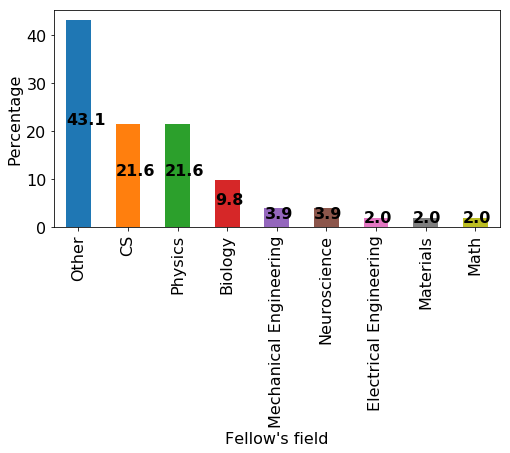

In [9]:
Physics = fellow_data.background.str.contains('Physics|physics|Astrophysics|Astronomy|Quantum')
Physics_per = 100 * Physics.sum()/num_fellows

Neuro = fellow_data.background.str.contains('Neuro|Neural')
Neuro_per = 100 * Neuro.sum()/num_fellows

Math = fellow_data.background.str.contains('Mathematics|Mathematical')
Math_per = 100 * Math.sum()/num_fellows

CS = fellow_data.background.str.contains('Computer|Computational')
CS_per = 100 * CS.sum()/num_fellows

Materials = fellow_data.background.str.contains('Materials')
Materials_per = 100 * Materials.sum()/num_fellows

Bio = fellow_data.background.str.contains('Bio')
Bio_per = 100 * Bio.sum()/num_fellows

ME = fellow_data.background.str.contains('Mechanical Engineering')
ME_per = 100 * ME.sum()/num_fellows

EE = fellow_data.background.str.contains('Electrical Engineering')
EE_per = 100 * EE.sum()/num_fellows

Other = ~(Physics | Neuro | Math | CS | Materials | Bio | ME | EE)
Other_per = 100 * Other.sum()/num_fellows

edu_field = ['Physics', 'Neuroscience','Math', 'CS', 'Materials', 'Biology',
             'Electrical Engineering', 'Mechanical Engineering', 'Other']
field_percentage = [Physics_per, Neuro_per, Math_per, CS_per, 
                    Materials_per, Bio_per, EE_per, ME_per, Other_per]
fellows_field = pd.Series(field_percentage, index = edu_field).sort_values(ascending = False)

plt.figure(figsize = (8,4))
plt.rcParams.update({'font.size': 16})
fellows_field.plot('bar')
plt.xlabel('Fellow\'s field')
plt.ylabel('Percentage')
for i,v in enumerate(fellows_field):
    plt.text(i -.25, v/2, str(round(v,1)), fontweight = 'bold')

#### What are the most common companies for fellows to work for after the program?

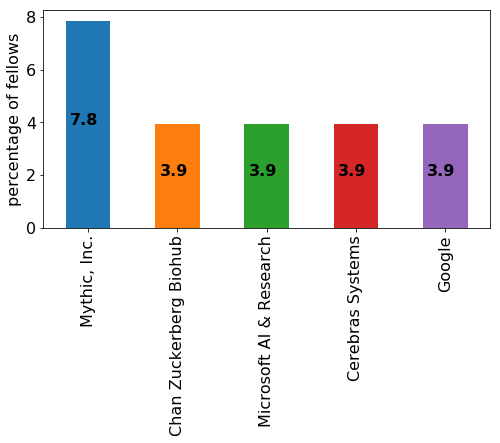

In [10]:
companies = fellow_data.company.value_counts()
companies_per = 100*companies[companies>1]/num_fellows # show percentage for companies with more than one employee

plt.figure(figsize = (8,4))
plt.rcParams.update({'font.size': 16})
companies_per.plot('bar')
plt.ylabel('percentage of fellows')
for i,v in enumerate(companies_per):
    plt.text(i -.2, v/2, str(round(v,1)), fontweight = 'bold')

#### What are the most common titles of fellows after the program?

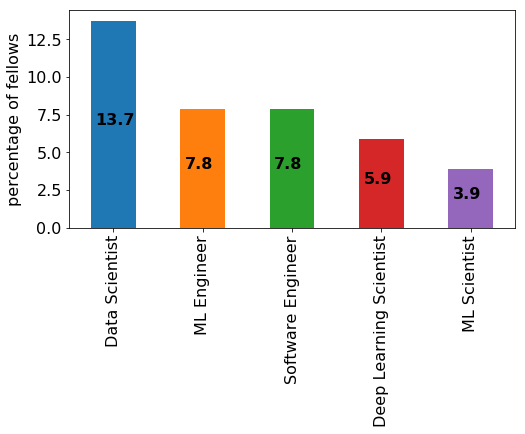

In [11]:
titles = fellow_data.title.value_counts()
titles_per = 100*titles[titles>1]/num_fellows

plt.figure(figsize = (8,4))
plt.rcParams.update({'font.size': 16})
titles_per.plot('bar')
plt.ylabel('percentage of fellows')
for i,v in enumerate(titles_per):
    plt.text(i -.2, v/2, str(round(v,1)), fontweight = 'bold')

In [12]:
titles

Data Scientist                             7
ML Engineer                                4
Software Engineer                          4
Deep Learning Scientist                    3
ML Scientist                               2
Deep Learning Software Engineer            1
Senior AI Scientist                        1
Bioinformatics scientist                   1
Software Engineer - ML                     1
Senior ML Scientist                        1
Technical Staff Member                     1
Deep Learning Engineer                     1
NLP / Deep Learning Engineer               1
Computational Biologist                    1
Software Engineer, Machine Learning        1
ML Consultant                              1
Research Scientist                         1
Machine Learning Research Scientist        1
AI Research & Engineering Lead             1
Senior Engineer of Machine Learning        1
Machine Learning Engineer                  1
SDE, Deep Learning Platform                1
Applied De

Very interesting, most of the AI fellows end up getting data scientist positions. I wonder how many fellows that end up with a scientist positions have PhD:

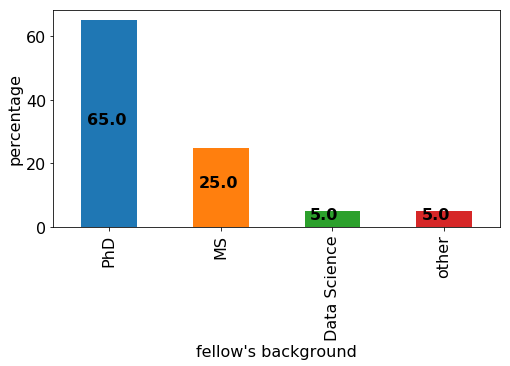

In [13]:
scientist_title = fellow_data[fellow_data.title.str.contains('Scientist')]
DSPhD = 100*scientist_title.background.str.contains('PhD').mean()
DSMS = 100*scientist_title.background.str.contains('MS').mean()
DS = 100*scientist_title.background.str.contains('Data Scientist').mean()
other = 100-DSPhD -DSMS -DS

scientists = pd.Series([DSPhD, DSMS, DS, other], index = ['PhD','MS', 'Data Science','other'])

plt.figure(figsize = (8,4))
plt.rcParams.update({'font.size': 16})
scientists.plot('bar')
plt.xlabel('fellow\'s background')
plt.ylabel('percentage')
for i,v in enumerate(scientists):
    plt.text(i -.2, v/2, str(round(v,1)), fontweight = 'bold')

We see that 90% of people from the AI program that end up getting a scientist positions had a PhD or MS the out of the rest, 5% where already had a previous background as data scientists. Let's check the last 5%:

In [14]:
scientist_title[~scientist_title.background.str.contains('PhD')
                & ~scientist_title.background.str.contains('MS')
                & ~scientist_title.background.str.contains('Data Scientist')]

,name,title,company,project,background
40,Ashwin Kumar,Deep Learning Scientist,"Mythic, Inc.",SketchCode: Never write front-end code again!,"CEO and Co-Founder, Sway Finance (YC S16)"


#### Is there any connection between the projects people do and their title after the program?

In order to check that, let's group the data by title, aggregate on pojects and see if we can see any connection

In [15]:
# define a function to aggregate strings
from functools import reduce
def add_strings(s):
    return reduce(lambda x,y: x+ ' | ' +y, s)

# create a data frame with titles and projects
project_title = fellow_data[['title', 'project']]
project_title['num'] = 1 # add a column for counting values 
project_title = project_title.groupby('title')\
.agg({'project': add_strings, 'num':'sum'}).sort_values('num', ascending = False)

project_title.style.set_properties(**{'text-align': 'center'})

c:\python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,project,num
title,,
Data Scientist,Explaining the predictions of any (text) classifier | SmartSurv: A 3D CNN that recognizes actions in video surveillance | Image encoding and reconstruction using convolutional variational autoencoders | Speech to the Speechless | Who Speaks: Let Every Voice Be Heard | The Force Awakens: Computer Vision for Home Control | Speak Again: Giving Voice to the Speech Impaired,7
Software Engineer,Bringing Synthetic Faces to Life using deep learning | Automatically adding/removing smiles from faces using deep adversarial models | Triaging Medical Queries | openLIS: Searching data faster with machine learning,4
ML Engineer,Real-time video super-resolution | entity2vec | HYPR.AI: Cloud-based AutoML | Thumbnails for Videos: A thumbnail worth a thousand frames,4
Deep Learning Scientist,Automatic Training for Deep Learning | SketchCode: Never write front-end code again! | Faraway Farms: Counting Sheep without Falling Asleep,3
ML Scientist,Bridging Vision and Language | Hero2vec: Forsee the game with hero embeddings,2
Senior ML Engineer,VideoText,1
Research Scientist,CNNs for image segmentation to separate overlapping chromosomes,1
"SDE, Deep Learning Platform","Pair-a-phrase it: Siri: Sorry, I didn’t get that.",1
Senior AI Scientist,What do you see? Using deep learning for image-based Q&A,1


#### Is there any connection between the projects people do and the company they end up working for?

Let's group by company and see what can we learn

In [16]:
project_company = fellow_data[['company', 'project']]
project_company['num'] = 1 # add a column for counting values 
project_company = project_company.groupby('company')\
.agg({'project': add_strings, 'num':'sum'}).sort_values('num', ascending = False)

project_company.style.set_properties(**{'text-align': 'center'})

c:\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,project,num
company,,
"Mythic, Inc.",Automatic Training for Deep Learning | openLIS: Searching data faster with machine learning | SketchCode: Never write front-end code again! | Faraway Farms: Counting Sheep without Falling Asleep,4
Cerebras Systems,HYPR.AI: Cloud-based AutoML | SimpleText: Neural Text Simplification,2
Microsoft AI & Research,"Generating realistic images from captions, using Generative Adversarial Networks and text embeddings | Thumbnails for Videos: A thumbnail worth a thousand frames",2
Google,Bringing Synthetic Faces to Life using deep learning | Automatically adding/removing smiles from faces using deep adversarial models,2
Chan Zuckerberg Biohub,Reducing the memory requirements of trained neural networks using weight pruning | Sounding Off: Heart diagnostics from anywhere,2
LinkedIn,Detecting links on network graphs,1
Lyft,Neural Road Inspector,1
Manifold Technology,Speak Again: Giving Voice to the Speech Impaired,1
Monsanto Company,SmartSurv: A 3D CNN that recognizes actions in video surveillance,1


It doesn't look like there is a clear connection, obviously we also need more data to get to any real conclusion...

One interesting fact is that the two fellows who ended up in Google both had a face related deep learning projects